In [8]:
import numpy as np
import scipy.fftpack as fp
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from scipy.signal import convolve2d, correlate2d, fftconvolve, gaussian
from matplotlib.ticker import LinearLocator

# Filtering in the frequency domain

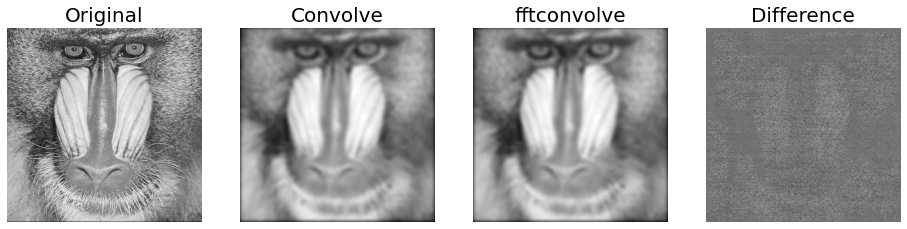

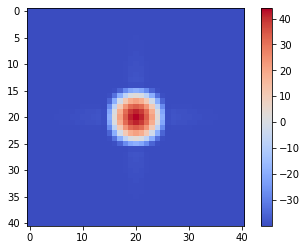

In [16]:
im = np.mean(io.imread('images/mandrill.tiff'), axis=2)
gauss_kernel = np.outer(gaussian(41,5), gaussian(41,5))
im_blur1 = convolve2d(im, gauss_kernel,mode='same')
im_blur2 = fftconvolve(im, gauss_kernel, mode='same')

plot_dim = (1,4)
cnt = 0
fig,axes = plt.subplots(nrows=plot_dim[0], ncols=plot_dim[1], figsize=(16,8),sharex=True, sharey=True)
cnt += 1
plt.subplot(plot_dim[0],plot_dim[1],cnt), plt.imshow(im, cmap='gray')
plt.title('Original', size=20), plt.axis('off')
cnt += 1
plt.subplot(plot_dim[0],plot_dim[1],cnt), plt.imshow(im_blur1, cmap='gray')
plt.title('Convolve', size=20), plt.axis('off')
cnt += 1
plt.subplot(plot_dim[0],plot_dim[1],cnt), plt.imshow(im_blur2, cmap='gray')
plt.title('fftconvolve', size=20), plt.axis('off')
cnt += 1
plt.subplot(plot_dim[0],plot_dim[1],cnt), plt.imshow(im_blur1-im_blur2, cmap='gray')
plt.title('Difference', size=20), plt.axis('off')

plt.show()

F_g = fp.fft2(fp.ifftshift(gauss_kernel))
S_g = np.abs(F_g)
S_g_scaled = 20*np.log10(fp.fftshift(S_g) + 0.01)
#plt.imshow(S_g_scaled, cmap='gray')
plt.imshow(S_g_scaled, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

## Visualize Gaussian low pass filters in 2D 

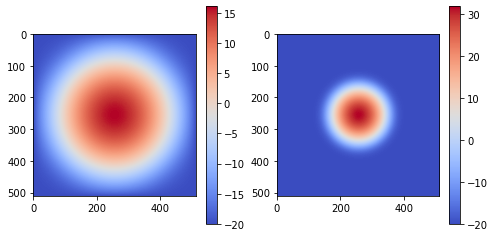

In [10]:
gauss_kernel_1 = np.outer(gaussian(im.shape[0],1.0), gaussian(im.shape[1],1.0))
F_g_1 = fp.fft2(fp.ifftshift(gauss_kernel_1))
S_g_1 = np.abs(F_g_1)
S_g_1_scaled = 20*np.log10(fp.fftshift(S_g_1) + 0.1)

gauss_kernel_2 = gauss_kernel_1 = np.outer(gaussian(im.shape[0],2.5), gaussian(im.shape[1],2.5))
F_g_2 = fp.fft2(fp.ifftshift(gauss_kernel_2))
S_g_2 = np.abs(F_g_2)
S_g_2_scaled = 20*np.log10(fp.fftshift(S_g_2) + 0.1)

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4),sharex=True,sharey=True)
plt.subplot(1,2,1), plt.imshow(S_g_1_scaled, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.subplot(1,2,2), plt.imshow(S_g_2_scaled, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

## Visualize Gaussian lowpass filters in 3D

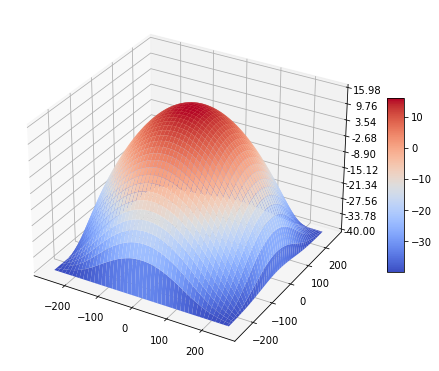

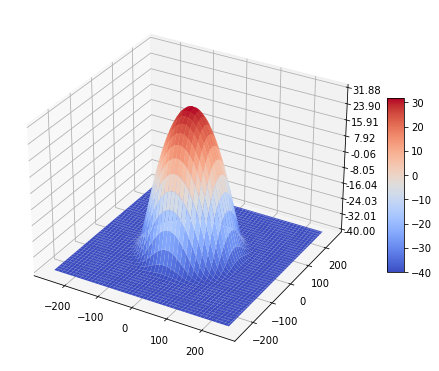

In [13]:
def plot_freq_spec_3D(S):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    Y = np.arange(-S.shape[0]//2,S.shape[0]-S.shape[0]//2)
    X = np.arange(-S.shape[1]//2,S.shape[1]-S.shape[1]//2)
    X, Y = np.meshgrid(X, Y)
    Z = (20*np.log10( 0.01 + fp.fftshift(S))).real
    surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,linewidth=0, antialiased=True)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter('{x:.02f}')
    fig.colorbar(surf,shrink=0.4, aspect=10)
    plt.show()
    
#plot_freq_spec_3D(S_gau)
#plot_freq_spec_3D(S_im)
plot_freq_spec_3D(S_g_1)
plot_freq_spec_3D(S_g_2)

    